# Kohonen Maps

## IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
import os
import cv2
%matplotlib inline

### MODEL

In [2]:
class KohonenMap():
    
    def __init__(self, x, mapWidth, mapLength):
        
        self.x = x
        shape = [mapWidth, mapLength] + list(x[0].shape)
        self.map = np.random.rand(*shape)
        
    def get_nearest_vector(self, sampleIndex):
        
        nearIndex = (0, 0)
        nearDist = np.linalg.norm(self.map[0, 0] - self.x[sampleIndex])
        
        for i in range(0, self.map.shape[0]):
            
            for j in range(0, self.map.shape[1]):
                
                if i == j == 0: 
                    continue
                
                tmpDist = np.linalg.norm(self.map[i, j] - self.x[sampleIndex])

                if tmpDist < nearDist:

                    nearDist = tmpDist
                    nearIndex = (i, j)
        
        return nearIndex
    
    def update_vectors(self, sampleIndex, nearIndex, alpha, teta):
        
        for i in range(0, self.map.shape[0]):
            
            for j in range(0, self.map.shape[1]):
                
                self.map[i, j] = self.map[i, j] + \
                    alpha * np.exp((np.linalg.norm(np.array([i, j]) - np.array(nearIndex)) * -1.0) / (2.0 * teta)) * \
                    (self.x[sampleIndex] - self.map[i, j])
                
    
    def plot_hist(self, y):
        
        cluster = []
        predict = []

        for i in range(self.x.shape[0]):

            minDist = np.linalg.norm(self.x[i] - self.map[0])
            nearC = 0

            for c in range(1, self.map.shape[0]):

                tmpDist = np.linalg.norm(self.x[i] - self.map[c])

                if tmpDist < minDist:

                    minDist = tmpDist
                    nearC = c

            predict.append(nearC)

        for i in range(self.map.shape[0]):

            samples_cat = []

            for j in range(len(predict)):

                if i == predict[j]:

                    samples_cat.append(y[j])

            cluster.append(samples_cat)

        plt.hist(cluster, self.map.shape[0], rwidth=0.9, align="left")
        plt.xticks(range(self.map.shape[0]))
        plt.show()
            
    def plot_result(self, rgb=False):
    
        axes = []
        fig = plt.figure()
        i, j = 0, 0
        size = self.map.shape[0] if self.map.shape[0] < 11 else 10

        for a in range(size * self.map.shape[1]):

            axes.append(fig.add_subplot(size, self.map.shape[1], a + 1))
            
            if rgb:
                plt.imshow(self.map[i, j].astype(int))
            
            else:
                plt.imshow(self.map[i, j])

            if j + 1 == self.map.shape[1]:
                j = 0
                i += 1
            else:
                j += 1

        plt.show()
    
    def run(self, epochs, alpha, teta):
        
        for e in range(0, epochs):
            
            sampleIndex = np.random.randint(0, self.x.shape[0], 1)
            nearIndex = self.get_nearest_vector(sampleIndex)
            self.update_vectors(sampleIndex, nearIndex, alpha, teta)

### TEST CASE

#### DATA

In [3]:
x_train = np.array([[1, 1], [1, 0.5], [3, 3], [3, 3.5], [5, 5], [5, 5.5]])
y_train = np.array([0, 0, 1, 1, 2, 2])

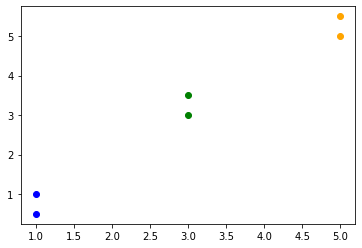

In [4]:
plt.scatter(x_train[:2, 0], x_train[:2, 1], color="blue")
plt.scatter(x_train[2:4, 0], x_train[2:4, 1], color="green")
plt.scatter(x_train[4:, 0], x_train[4:, 1], color="orange")
plt.show()

#### TRAIN

In [5]:
khm = KohonenMap(x_train, 3, 1)
khm.run(1000, 0.5, 0.1)

#### RESULT

##### GÉNÉRATION

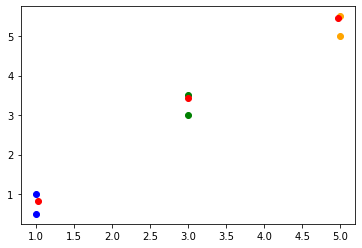

In [6]:
plt.scatter(x_train[:2, 0], x_train[:2, 1], color="blue")
plt.scatter(x_train[2:4, 0], x_train[2:4, 1], color="green")
plt.scatter(x_train[4:, 0], x_train[4:, 1], color="orange")
for i in range(0, khm.map.shape[0]):
    plt.scatter(khm.map[i, :, 0], khm.map[i, :, 1], color="red")
plt.show()

##### histogramme

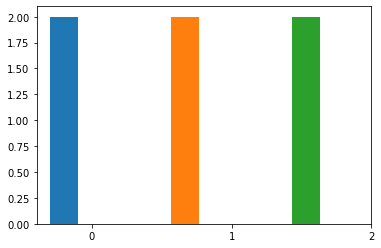

In [7]:
khm.plot_hist(y_train)

### MINST DIGITS

#### DATA

In [8]:
def get_dataset():
    
    (x_train, y_train), (x_test, y_test) = load_data()
    x_train = x_train.astype('float64')
    x_test = x_test.astype('float64')
    return x_train, x_test, y_train, y_test

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Training examples


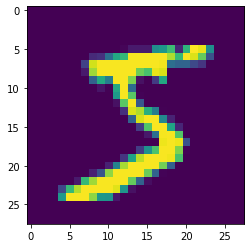

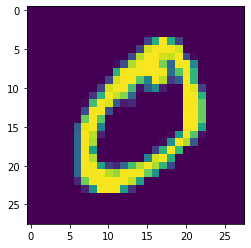

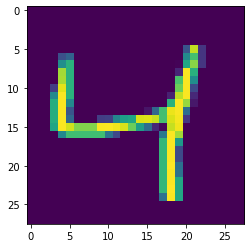

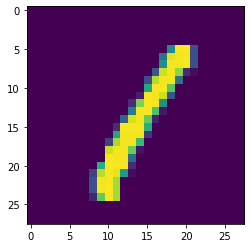

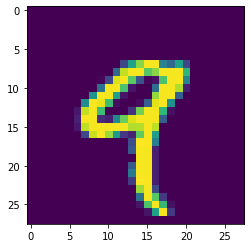

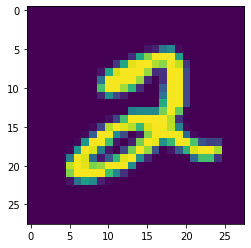

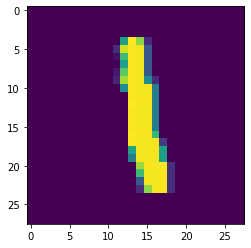

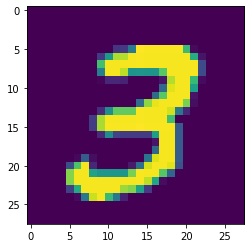

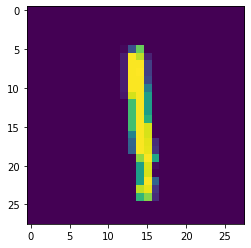

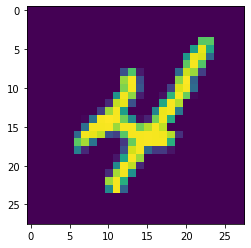

Test examples


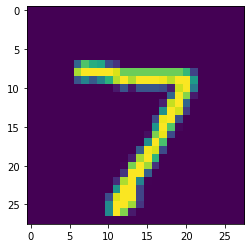

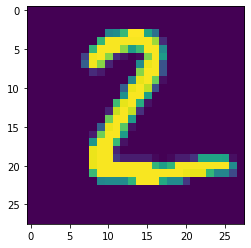

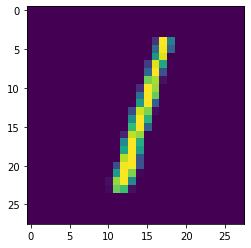

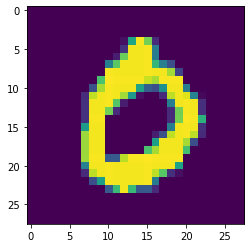

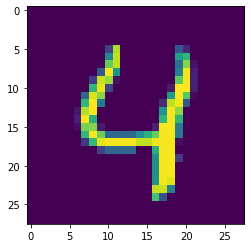

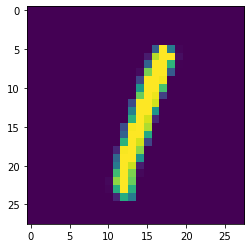

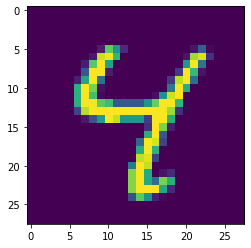

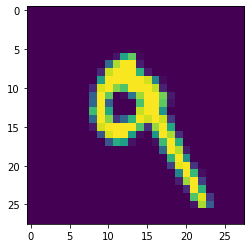

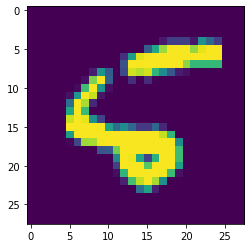

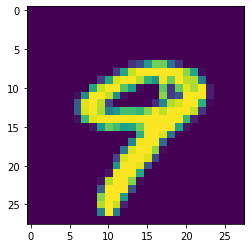

In [9]:
x_train, x_test, y_train, y_test = get_dataset()

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

#### PARAMETERS

In [10]:
alpha = 0.1
teta = 0.1
step = 0.1
epochs = x_train.shape[0]

#### TRAIN

alpha: 0.1
teta: 0.1


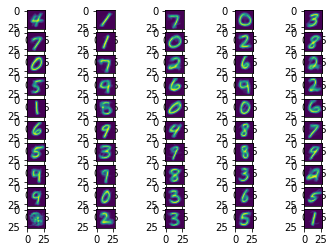

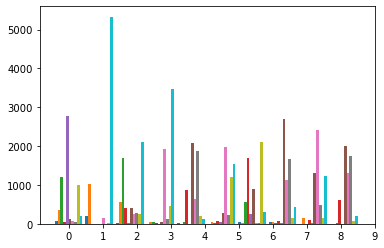

alpha: 0.1
teta: 0.2


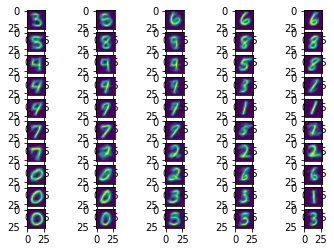

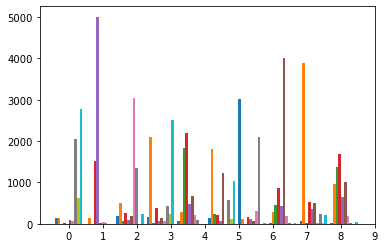

alpha: 0.1
teta: 0.30000000000000004


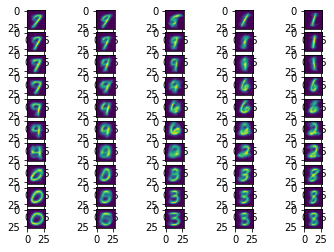

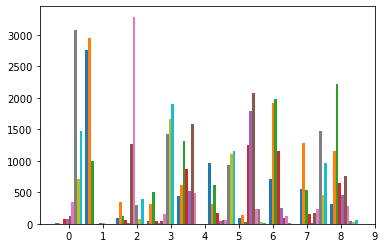

alpha: 0.1
teta: 0.4


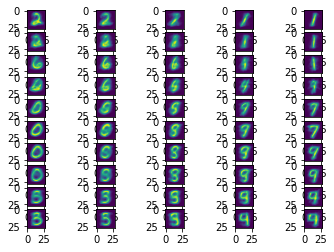

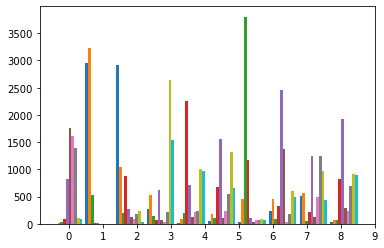

alpha: 0.1
teta: 0.5


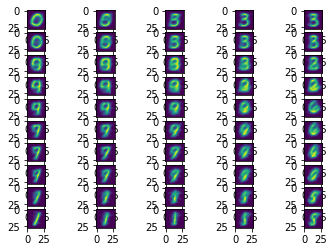

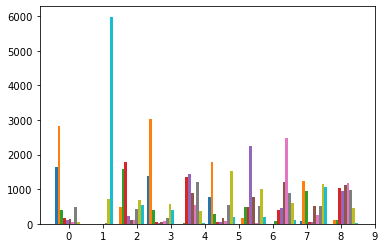

alpha: 0.1
teta: 0.6


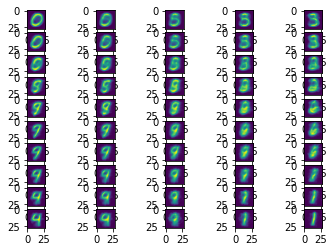

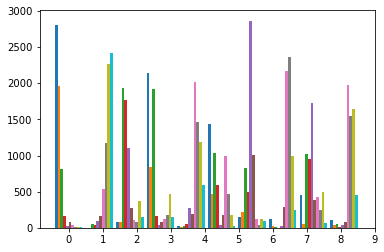

alpha: 0.1
teta: 0.7


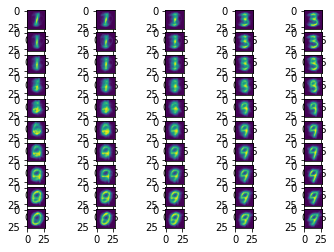

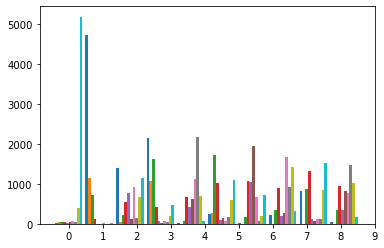

alpha: 0.1
teta: 0.7999999999999999


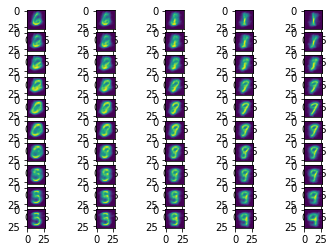

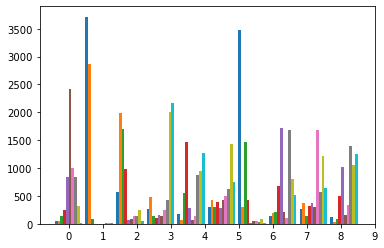

alpha: 0.1
teta: 0.8999999999999999


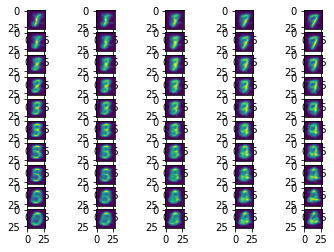

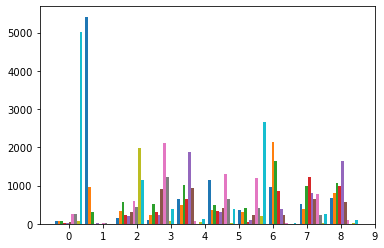

alpha: 0.1
teta: 0.9999999999999999


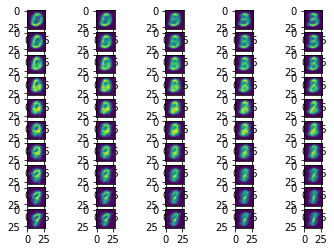

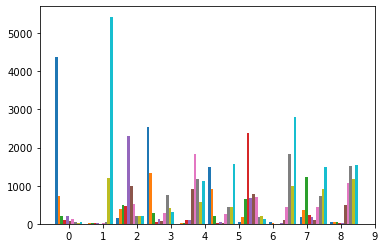

In [11]:
while alpha < 1.0:
    
    while teta < 1.0:

        print("alpha: " + str(alpha))
        print("teta: " + str(teta))
        
        khm = KohonenMap(x_train, 10, 5)
        khm.run(epochs, alpha, teta)
        khm.plot_result()
        khm.plot_hist(y_train)
        
        teta += 0.1
        
    alpha += 0.1

### FRUITS 360

#### DATA

In [14]:
def get_dataset(gray=False, size=None):
    
    train_path = "/home/cecile/Downloads/fruits-360/Training/"
    test_path = "/home/cecile/Downloads/fruits-360/Test/"
    x_train, x_test, y_train, y_test = [], [], [], []
    
    classe = 0
    
    for filename in os.listdir(train_path):
        
        for fruit_file in os.listdir(train_path + filename):
            
            image = cv2.imread(train_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            if size is not None:
                image = cv2.resize(image, size)
            
            x_train.append(image)
            y_train.append(classe)
        
        classe += 1
    
    classe = 0
            
    for filename in os.listdir(test_path):
        
        for fruit_file in os.listdir(test_path + filename):
            
            image = cv2.imread(test_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
            if size is not None:
                image = cv2.resize(image, size)
            
            x_test.append(image)
            y_test.append(classe)
        
        classe += 1
    
    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return x_train, x_test, y_train, y_test

x_train shape: (67692, 28, 28, 3)
x_test shape: (22688, 28, 28, 3)
Training examples


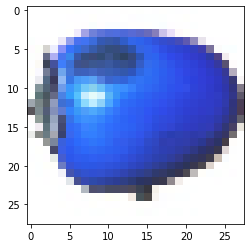

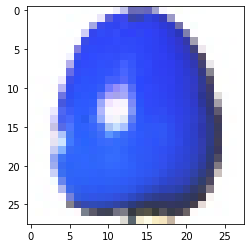

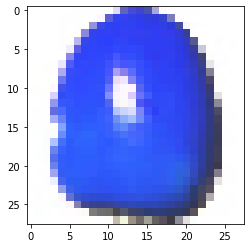

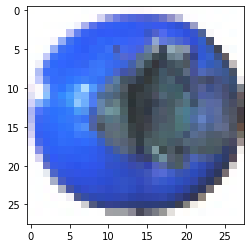

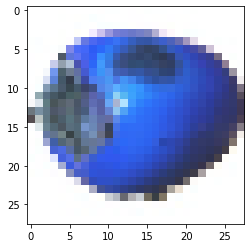

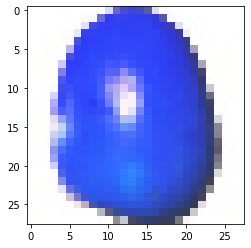

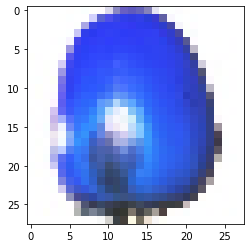

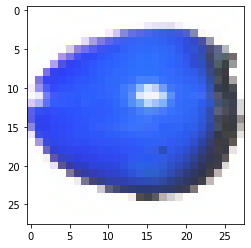

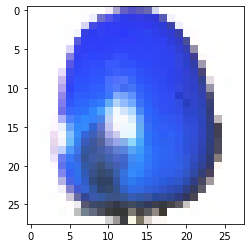

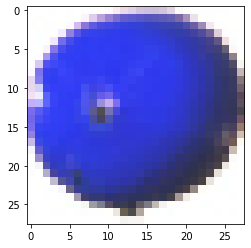

Test examples


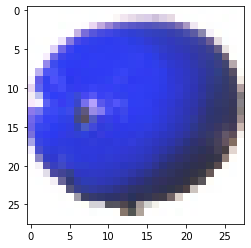

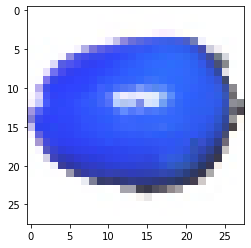

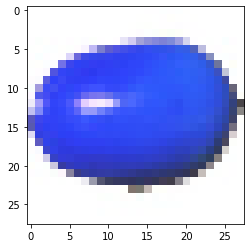

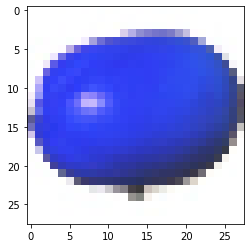

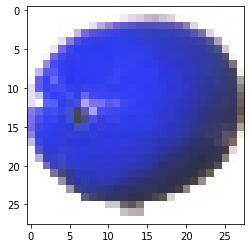

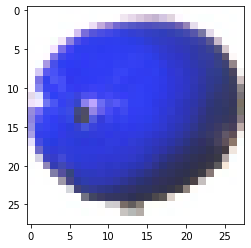

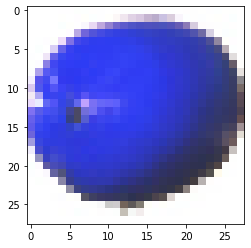

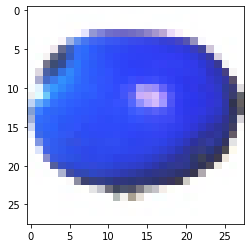

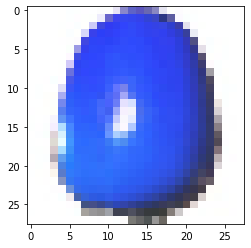

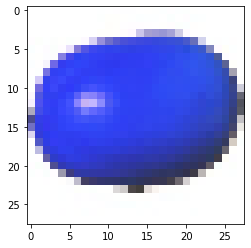

In [15]:
x_train, x_test, y_train, y_test = get_dataset(False, (28, 28))

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

#### PARAMETERS

In [16]:
alpha = 0.1
teta = 0.1
step = 0.1
epochs = x_train.shape[0]

#### TRAIN

alpha: 0.1
teta: 0.1


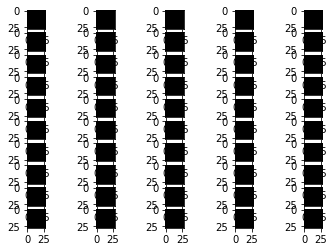

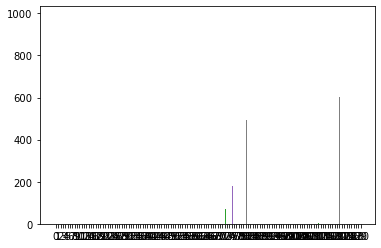

alpha: 0.1
teta: 0.2


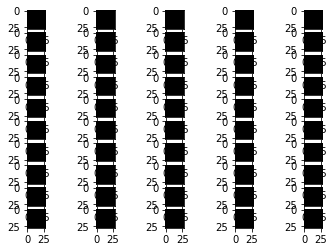

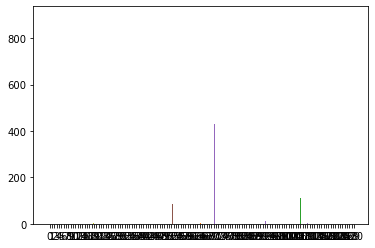

alpha: 0.1
teta: 0.30000000000000004


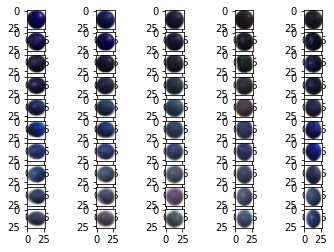

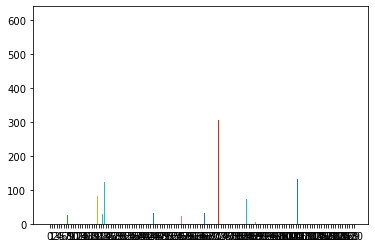

alpha: 0.1
teta: 0.4


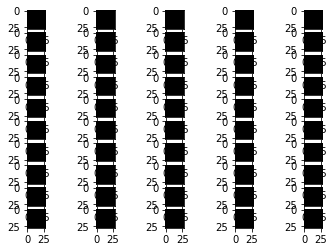

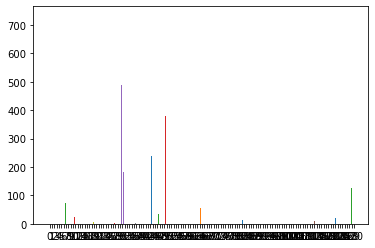

alpha: 0.1
teta: 0.5


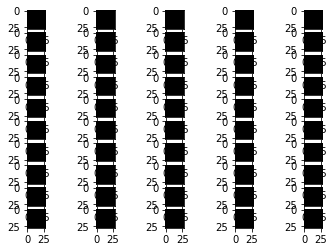

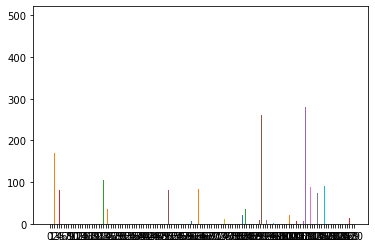

alpha: 0.1
teta: 0.6


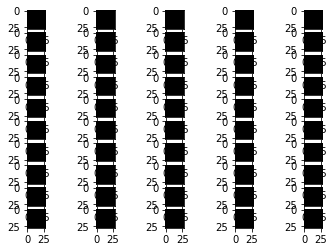

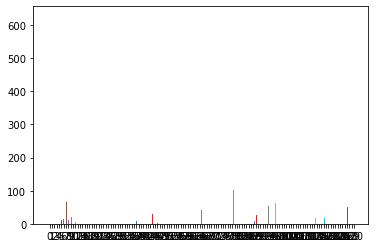

alpha: 0.1
teta: 0.7


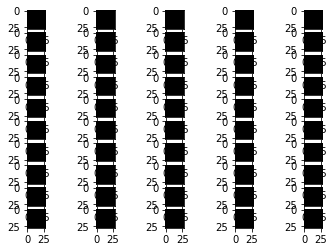

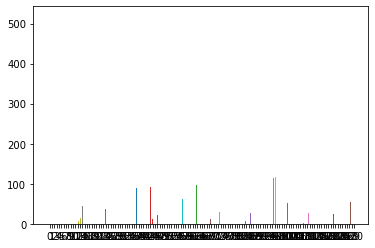

alpha: 0.1
teta: 0.7999999999999999


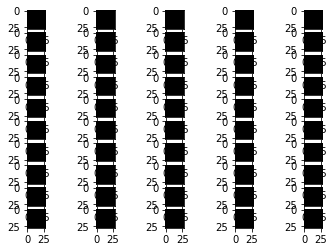

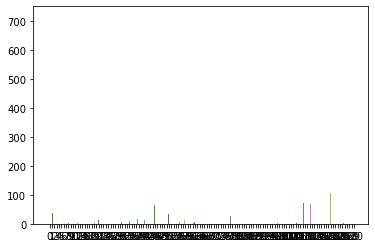

alpha: 0.1
teta: 0.8999999999999999


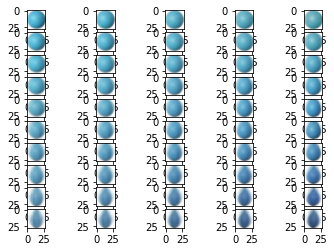

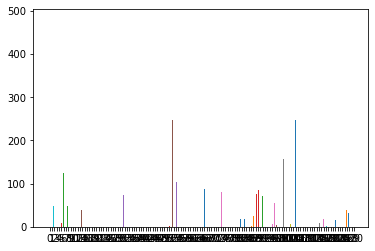

alpha: 0.1
teta: 0.9999999999999999


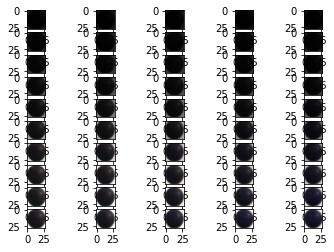

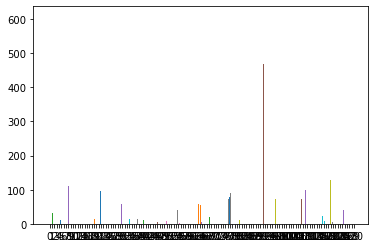

In [17]:
while alpha < 1.0:
    
    while teta < 1.0:

        print("alpha: " + str(alpha))
        print("teta: " + str(teta))
        
        khm = KohonenMap(x_train, 131, 5)
        khm.run(epochs, alpha, teta)
        khm.plot_result(True)
        khm.plot_hist(y_train)
        
        teta += 0.1
    
    alpha += 0.1